# Credit Card Fraud Analysis - ML Project 

# Dataset loading and initial processing

In [1]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("C:\\Users\\Tanis\\ML_Project\\fraudTrain.csv")

In [3]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01/01/2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01/01/2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


Text(0, 0.5, 'Frequency')

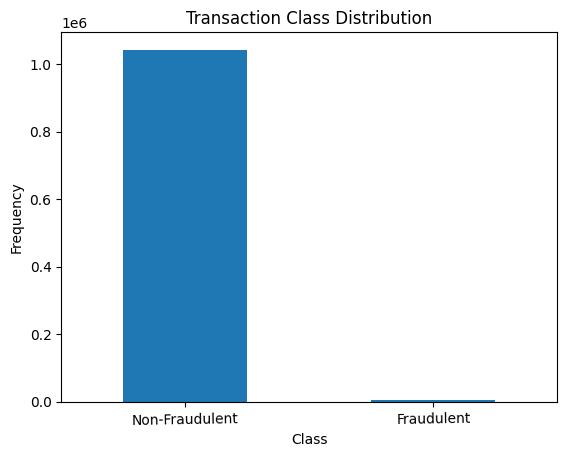

In [4]:
count_classes = pd.value_counts(df['is_fraud'])

count_classes.plot(kind = 'bar', rot=1) 

plt.title("Transaction Class Distribution")
LABELS = ["Non-Fraudulent", "Fraudulent"]
plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

# Performing Under Sampling for balancing the Dataset

In [5]:
# Split variables into X and y
X = df.drop('is_fraud', axis=1)
y = df['is_fraud'] # target variable

# Count the number of occurrences of each class in the target variable
count_classes = pd.value_counts(y)
# Print the count
print(count_classes)

is_fraud
0    1042569
1       6006
Name: count, dtype: int64


In [6]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and resample
X_res, y_res = rus.fit_resample(X, y)


In [7]:
# Count the number of occurrences of each class in the target variable
count_classes_res = pd.value_counts(y_res)

# Print the count
print(count_classes_res)


is_fraud
0    6006
1    6006
Name: count, dtype: int64


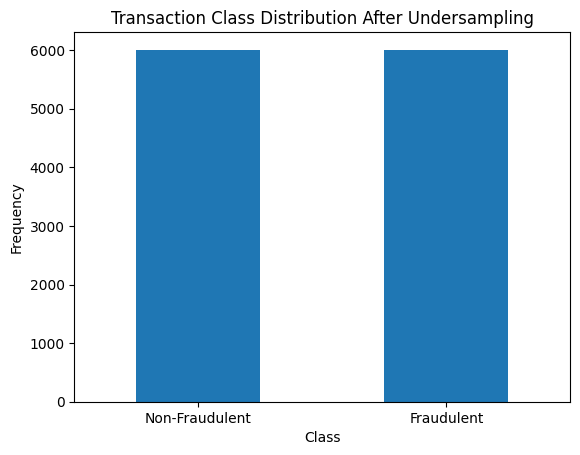

In [8]:
# Plot the class distribution
count_classes_res.plot(kind='bar', rot=0)

# Set the title and labels
plt.title("Transaction Class Distribution After Undersampling")
LABELS = ["Non-Fraudulent", "Fraudulent"]
plt.xticks(range(2), LABELS)

# Set the x and y labels
plt.xlabel("Class")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [9]:
# Combine X_res and y_res into a single DataFrame
df = pd.concat([X_res, y_res], axis=1)

# If you want to reset the index of the new DataFrame
df = df.reset_index(drop=True)


In [10]:
# data = df

# Preparing Dataset for PCA

# Extracting information from trans_date_trans_time column

In [11]:
# preprocessing trans_date_trans_time column
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format="%d/%m/%Y %H:%M")

# Extract components of the datetime
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute

# Display the preprocessed DataFrame
print(df)


       Unnamed: 0 trans_date_trans_time        cc_num  \
0          669418   2019-10-12 18:21:00  4.089100e+18   
1           32567   2019-01-20 13:06:00  4.247920e+12   
2          156587   2019-03-24 18:09:00  4.026220e+12   
3         1020243   2020-02-25 15:12:00  4.957920e+12   
4          116272   2019-03-06 23:19:00  4.178100e+15   
...           ...                   ...           ...   
12007     1047089   2020-03-10 03:59:00  3.589290e+15   
12008     1047157   2020-03-10 04:31:00  3.546670e+15   
12009     1047208   2020-03-10 04:59:00  3.589290e+15   
12010     1047521   2020-03-10 08:22:00  3.589290e+15   
12011     1047918   2020-03-10 12:09:00  3.589290e+15   

                                merchant       category     amt   first  \
0      fraud_Haley, Jewess and Bechtelar   shopping_pos    7.53   Debra   
1                       fraud_Turner LLC         travel    3.79  Judith   
2                      fraud_Klein Group  entertainment   59.07  Debbie   
3              

In [12]:
print(df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')


In [13]:
df = df.drop(columns=['trans_date_trans_time'])

# Encoding Categorical Values

In [14]:
columns_to_encode = ['merchant', 'category', 'gender', 'city', 'state']

#frequency encoding
for column in columns_to_encode:
    frequency_map = df[column].value_counts(normalize=True).to_dict()
    df[column + '_encoded'] = df[column].map(frequency_map)

# Display the result
print(df)

       Unnamed: 0        cc_num                           merchant  \
0          669418  4.089100e+18  fraud_Haley, Jewess and Bechtelar   
1           32567  4.247920e+12                   fraud_Turner LLC   
2          156587  4.026220e+12                  fraud_Klein Group   
3         1020243  4.957920e+12                fraud_Monahan-Morar   
4          116272  4.178100e+15                fraud_Kozey-Kuhlman   
...           ...           ...                                ...   
12007     1047089  3.589290e+15                 fraud_Kris-Weimann   
12008     1047157  3.546670e+15      fraud_Casper, Hand and Zulauf   
12009     1047208  3.589290e+15                    fraud_Kiehn Inc   
12010     1047521  3.589290e+15                 fraud_Rau and Sons   
12011     1047918  3.589290e+15            fraud_O'Connell-Ullrich   

            category     amt   first     last gender  \
0       shopping_pos    7.53   Debra    Stark      F   
1             travel    3.79  Judith     Moss  

In [15]:
df.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'year', 'month', 'day', 'hour', 'minute',
       'merchant_encoded', 'category_encoded', 'gender_encoded',
       'city_encoded', 'state_encoded'],
      dtype='object')

In [16]:
# Viewing Numeric Data
numeric_columns = df.select_dtypes(include=[np.number])
print(numeric_columns.columns)

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'year', 'month',
       'day', 'hour', 'minute', 'merchant_encoded', 'category_encoded',
       'gender_encoded', 'city_encoded', 'state_encoded'],
      dtype='object')


In [17]:
numeric_columns.isnull().values.any()

False

In [18]:
df.shape

(12012, 32)

In [19]:
numeric_columns.shape

(12012, 21)

# PCA calculation of Numeric Data

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Specify the columns to keep unchanged
columns_to_keep = ["amt", "is_fraud"]  

# Extract the columns for PCA
columns_for_pca = df.drop(columns_to_keep, axis=1)

# Step 1: Standardize the numeric data for PCA
numeric_columns = columns_for_pca.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_columns)

# Step 2: Create a PCA instance
pca = PCA()

# Step 3: Fit the PCA instance to the combined data
pca.fit(scaled_numeric_data)

# Step 5: Transform the original data to the new coordinate system
transformed_data = pca.transform(scaled_numeric_data)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i+1}' for i in range(transformed_data.shape[1])]
pc_df = pd.DataFrame(transformed_data, columns=pc_columns)

# Combine the unchanged columns with the PCA components
final_data = pd.concat([df[columns_to_keep], pc_df], axis=1)


In [21]:
final_data.head()

,amt,is_fraud,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,7.53,0,0.769668,-1.075692,-1.845398,-0.184481,-0.997218,-2.014573,0.372970,0.010799,...,1.843703,1.768178,1.414819,-0.724200,-0.026686,-0.426030,-0.016891,-0.009775,0.021294,0.000124
1,3.79,0,-1.136661,2.263995,-0.348672,-1.998219,1.108192,-0.040160,0.173492,-1.332707,...,0.293952,0.610710,-0.224001,-0.215770,0.110670,-0.242095,-0.053617,0.073899,0.025135,0.000039
2,59.07,0,-2.244804,1.469008,1.142332,-1.888394,0.542106,-1.250228,0.409900,-1.178941,...,-0.091119,-0.105360,0.408522,1.652734,-0.311124,0.111090,0.018859,-0.019518,-0.028850,-0.002436
3,25.58,0,2.263771,-2.448405,1.072725,-0.575453,2.111521,-0.977030,1.753706,-0.638255,...,-0.970926,0.311827,-0.892225,0.771217,0.432371,-0.262585,-0.073162,-0.040086,-0.037600,0.003591
4,84.96,0,-0.582948,1.947184,0.685918,-1.666971,0.834694,-0.507442,-0.501065,-0.832774,...,-0.143118,0.417433,0.937909,0.319605,0.137678,-0.315847,0.072350,-0.005968,-0.014771,-0.002606


# Exploratory Data Analysis

In [22]:
# Determine number of fraud cases in dataset 
fraud = final_data[final_data['is_fraud'] == 1] 
valid = final_data[final_data['is_fraud'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(final_data[final_data['is_fraud'] == 1]))) 
print('Valid Transactions: {}'.format(len(final_data[final_data['is_fraud'] == 0]))) 


1.0
Fraud Cases: 6006
Valid Transactions: 6006


In [23]:
print('Amount details of the fraudulent transaction') 
fraud.amt.describe() 

Amount details of the fraudulent transaction


count    6006.000000
mean      530.573492
std       391.333069
min         1.180000
25%       241.577500
50%       391.165000
75%       901.950000
max      1371.810000
Name: amt, dtype: float64

In [24]:
print('details of valid transaction') 
valid.amt.describe() 

details of valid transaction


count     6006.000000
mean        71.763348
std        370.569524
min          1.010000
25%          9.492500
50%         46.480000
75%         83.397500
max      27390.120000
Name: amt, dtype: float64

# Correlation Matrix and HeatMap

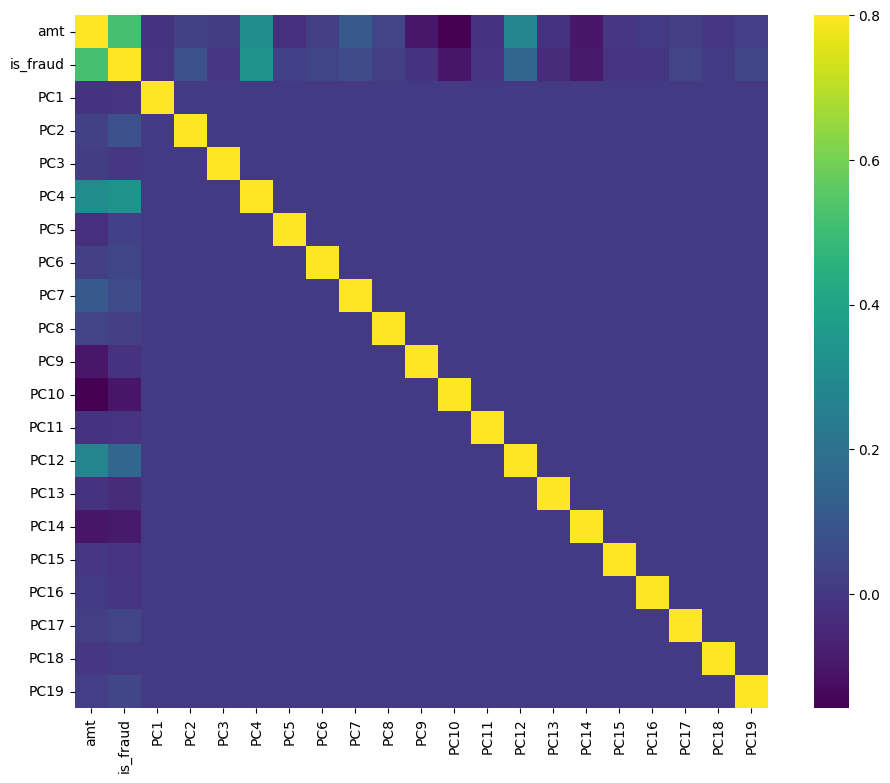

In [25]:
corrmat = final_data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True, cmap='viridis') 
plt.show() 

In [26]:
# dividing the X and the Y from the dataset 
X = final_data.drop(['is_fraud'], axis = 1) 
Y = final_data["is_fraud"] 
print(X.shape) 
print(Y.shape) 
xData = X.values 
yData = Y.values 


(12012, 20)
(12012,)


In [27]:
# Using Scikit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
		xData, yData, test_size = 0.2, random_state = 42) 

# Random Forest Classifier & Confusion Matrix

In [28]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions  
yPred_rfc = rfc.predict(xTest) 

In [29]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(fraud) 
n_errors = (yPred_rfc != yTest).sum() 
print("The model used is Random Forest classifier") 

acc = accuracy_score(yTest, yPred_rfc) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(yTest, yPred_rfc) 
print("The precision is {}".format(prec)) 

rec = recall_score(yTest, yPred_rfc) 
print("The recall is {}".format(rec)) 

f1 = f1_score(yTest, yPred_rfc) 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(yTest, yPred_rfc) 
print("The Matthews correlation coefficient is {}".format(MCC)) 


The model used is Random Forest classifier
The accuracy is 0.9305035372451103
The precision is 0.9576576576576576
The recall is 0.8985629754860525
The F1-Score is 0.9271696467509812
The Matthews correlation coefficient is 0.8624409533350984


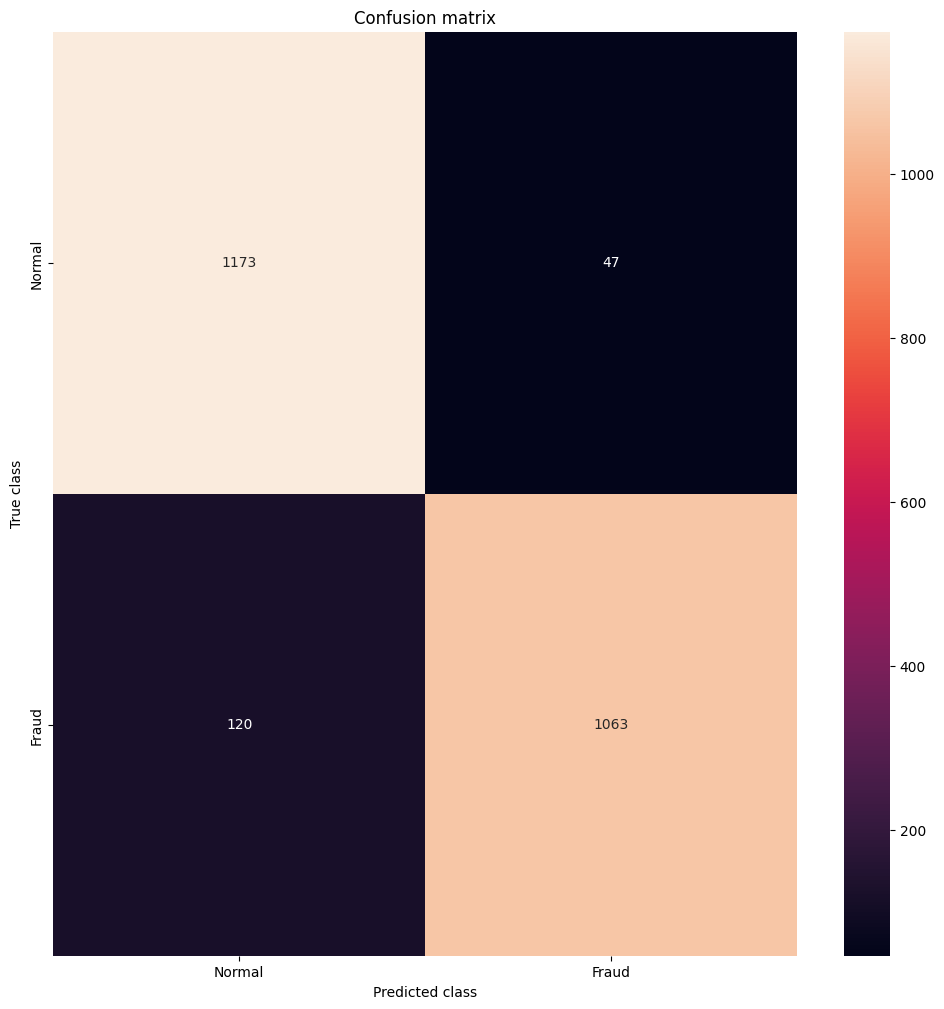

In [30]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred_rfc) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, 
			yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 


# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 

X = final_data.drop(['is_fraud'], axis = 1) 
y = final_data["is_fraud"] 
#splitting dataset 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier accuracy: {accuracy}")

prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 

rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 


Decision Tree Classifier accuracy: 0.9022055763628797
The precision is 0.9003378378378378
The recall is 0.9010989010989011
The F1-Score is 0.9007182087029996
The Matthews correlation coefficient is 0.8043675578026449


# Gaussian Naive Bayes

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 

X_train, X_test, y_train, y_test = train_test_split(xData, yData, test_size=0.4, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, y_pred))

prec = precision_score(y_test, y_pred) 
print("The precision is {}".format(prec)) 

rec = recall_score(y_test, y_pred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

Gaussian Naive Bayes model accuracy: 0.8472424557752342
The precision is 0.932601880877743
The recall is 0.7468619246861925
The F1-Score is 0.8294609665427509
The Matthews correlation coefficient is 0.708231130368494


# K-Fold

In [33]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
#Implementing cross validation
#We performed a binary classification using Logistic regression as our model and cross-validated it using 5-Fold cross-validation. 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(xData):
    X_train , X_test = xData[train_index,:],xData[test_index,:]
    y_train , y_test = yData[train_index] , yData[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('Accuracy of each fold - {}'.format(acc_score))
print('Average Accuracy : {}'.format(avg_acc_score))

Accuracy of each fold - [0.8585101955888472, 0.8514357053682896, 0.8180682764363031, 0.6548709408825978, 0.384263114071607]
Average Accuracy : 0.7134296464695289


# Implementing Predictive Model 

In [35]:
test = pd.read_csv("C:\\Users\\Tanis\\ML_Project\\fraudTest.csv")

In [36]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [37]:
test.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


# Applying the same Preprocessing on the test dataset

In [38]:
# Preprocess trans_date_trans_time column
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'], format="%Y-%m-%d %H:%M:%S")

# Extract components of the datetime
test['year'] = test['trans_date_trans_time'].dt.year
test['month'] = test['trans_date_trans_time'].dt.month
test['day'] = test['trans_date_trans_time'].dt.day
test['hour'] = test['trans_date_trans_time'].dt.hour
test['minute'] = test['trans_date_trans_time'].dt.minute

# Display the preprocessed DataFrame
print(test)


        Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       frau

In [39]:
 test = test.drop(columns=['trans_date_trans_time'])

In [40]:
columns_to_encode = ['merchant', 'category', 'gender', 'city', 'state']

#frequency encoding
for column in columns_to_encode:
    frequency_map = test[column].value_counts(normalize=True).to_dict()
    test[column + '_encoded'] = test[column].map(frequency_map)

# Display the result
print(test)

        Unnamed: 0            cc_num                              merchant  \
0                0  2291163933867244                 fraud_Kirlin and Sons   
1                1  3573030041201292                  fraud_Sporer-Keebler   
2                2  3598215285024754  fraud_Swaniawski, Nitzsche and Welch   
3                3  3591919803438423                     fraud_Haley Group   
4                4  3526826139003047                 fraud_Johnston-Casper   
...            ...               ...                                   ...   
555714      555714    30560609640617                 fraud_Reilly and Sons   
555715      555715  3556613125071656                  fraud_Hoppe-Parisian   
555716      555716  6011724471098086                       fraud_Rau-Robel   
555717      555717     4079773899158                 fraud_Breitenberg LLC   
555718      555718  4170689372027579                     fraud_Dare-Marvin   

              category     amt    first      last gender  \
0  

In [41]:
# Viewing Numeric Data
numeric_columns = test.select_dtypes(include=[np.number])
print(numeric_columns.columns)

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'year', 'month',
       'day', 'hour', 'minute', 'merchant_encoded', 'category_encoded',
       'gender_encoded', 'city_encoded', 'state_encoded'],
      dtype='object')


In [42]:
numeric_columns.isnull().values.any()

False

# Applying PCA 

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Specify the columns to keep unchanged
columns_to_keep = ["amt", "is_fraud"]  

# Extract the columns for PCA
columns_for_pca = test.drop(columns_to_keep, axis=1)

# Step 1: Standardize the numeric data for PCA
numeric_columns = columns_for_pca.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_columns)

# Step 2: Create a PCA instance
pca = PCA()

# Step 3: Fit the PCA instance to the combined data
pca.fit(scaled_numeric_data)

# Step 5: Transform the original data to the new coordinate system
transformed_data = pca.transform(scaled_numeric_data)

# Create a DataFrame with the principal components
pc_columns = [f'PC{i+1}' for i in range(transformed_data.shape[1])]
pc_df = pd.DataFrame(transformed_data, columns=pc_columns)

# Combine the unchanged columns with the PCA components
final_data = pd.concat([test[columns_to_keep], pc_df], axis=1)


# Predictive Model

In [44]:
# checking fraud rows indices
fraudulent_indices = final_data[final_data["is_fraud"] == 1].index
print(fraudulent_indices)

Index([  1685,   1767,   1781,   1784,   1857,   1891,   1906,   1956,   1968,
         2026,
       ...
       511272, 511374, 511675, 512502, 514913, 517197, 517274, 517341, 517529,
       517571],
      dtype='int64', length=2145)


In [45]:
# Rechecking any one of such an fraudulent index
final_data.iloc[511675:511676]

,amt,is_fraud,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
511675,981.22,1,-2.31163,-0.491172,-0.402433,0.19299,-1.853107,0.531898,-0.574916,-1.581542,...,1.725857,-0.200075,1.293584,0.047384,0.27581,-0.008666,0.083297,0.048323,-0.001349,1.714877e-16


In [46]:
final_data = final_data.drop(columns=['is_fraud'],axis = 1)

In [49]:
row_to_predict = final_data.iloc[511675:511676]  # Select the row as a DataFrame

# Predict the result for the selected row
prediction = rfc.predict(row_to_predict)
print(prediction)

if prediction == 1:
    print("Fraud")
else:
    print("Normal")

[1]
Fraud


C:\Users\Tanis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [48]:
row_to_predict = final_data.iloc[1957:1958]  

# Predict the result for the selected row
prediction = rfc.predict(row_to_predict)
print(prediction)

if prediction == 1:
    print("Fraud")
else:
    print("Normal")

[0]
Normal


C:\Users\Tanis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
